In [1]:
from classification_model_tester import ModelTester
import pandas as pd
import numpy as np

In [2]:
dt_1 = pd.read_csv("../dati_dott_fedele/dati_m2_incolonnati.csv")
dt_2 = pd.read_csv("../dati_dott_fedele/dati_m2_incolonnati_v2.csv")

#### Test n.1: dataset without the feature 'previous_alert'

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, accuracy_score,f1_score

models = {
    # LogisticRegression
    LogisticRegression(max_iter=10000000) : { 
        'penalty': ['none', 'l1', 'l2', 'elasticnet'],
        'C': np.logspace(-3, 9, 7),
        'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
        'tol': np.logspace(-5, -1, 5)
    },

    # SVC
    SVC(probability=True) : { 
        'kernel': ['rbf', 'poly', 'linear'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
        'gamma': ['scale', 'auto'],
        'degree': [2, 3, 4, 5]  
    }
   
}

from imblearn.over_sampling import SMOTE, ADASYN

resampling_methods = [
    SMOTE(random_state=42, sampling_strategy='auto'),
    ADASYN(random_state=42, sampling_strategy='minority')
]
metrics = {"accuracy":accuracy_score,"precision":precision_score,"recall":recall_score,"f1-score":f1_score}

tester_exp1 = ModelTester(models,metrics,dt_1.copy(),"alert",resamplingMethods=resampling_methods,ensambleModelList=[StackingClassifier(estimators=None)])


In [ ]:
%run monitor_resource.py

Output()

In [7]:
tester_exp1.best_param_calculator(cv=2,avg="macro")

Testing model: LogisticRegression(max_iter=10000000) with GridSearchCV
Fitting 2 folds for each of 700 candidates, totalling 1400 fits


c:\Users\mlupi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


c:\Users\mlupi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
910 fits failed out of a total of 1400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
350 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mlupi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mlupi\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\mlupi\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\mlupi\anaconda3\Lib\site-packa

	Best parameters for accuracy: {'C': 10.0, 'penalty': 'l1', 'solver': 'saga', 'tol': 1e-05}
	Best score for accuracy: 0.8183333333333334
	Best parameters for precision: {'C': 10.0, 'penalty': 'l1', 'solver': 'saga', 'tol': 1e-05}
	Best score for precision: 0.7588915295637573
	Best parameters for recall: {'C': 10.0, 'penalty': 'l1', 'solver': 'saga', 'tol': 1e-05}
	Best score for recall: 0.7349964329369911
	Best parameters for f1-score: {'C': 10.0, 'penalty': 'l1', 'solver': 'saga', 'tol': 1e-05}
	Best score for f1-score: 0.7432785972121638
Testing model: SVC(probability=True) with GridSearchCV
Fitting 2 folds for each of 168 candidates, totalling 336 fits


	Best parameters for accuracy: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
	Best score for accuracy: 0.815
	Best parameters for precision: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
	Best score for precision: 0.7564208607370386
	Best parameters for recall: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
	Best score for recall: 0.7394117863163276
	Best parameters for f1-score: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
	Best score for f1-score: 0.7464212888064341


In [ ]:
performances

{'overall': {'LogisticRegression': {'accuracy': {'{"C": 10.0, "penalty": "l1", "solver": "saga", "tol": 1e-05}': 0.8183333333333334},
   'precision': {'{"C": 10.0, "penalty": "l1", "solver": "saga", "tol": 1e-05}': 0.7588915295637573},
   'recall': {'{"C": 10.0, "penalty": "l1", "solver": "saga", "tol": 1e-05}': 0.7349964329369911},
   'f1-score': {'{"C": 10.0, "penalty": "l1", "solver": "saga", "tol": 1e-05}': 0.7432785972121638}},
  'SVC': {'accuracy': {'{"C": 1, "degree": 2, "gamma": "scale", "kernel": "linear"}': 0.815},
   'precision': {'{"C": 1, "degree": 2, "gamma": "scale", "kernel": "linear"}': 0.7564208607370386},
   'recall': {'{"C": 1, "degree": 2, "gamma": "scale", "kernel": "linear"}': 0.7394117863163276},
   'f1-score': {'{"C": 1, "degree": 2, "gamma": "scale", "kernel": "linear"}': 0.7464212888064341}}},
 'specific': {'LogisticRegression': {'accuracy_GREEN': None,
   'accuracy_RED': None,
   'accuracy_YELLOW': None,
   'precision_GREEN': None,
   'precision_RED': None,


AttributeError: 'NoneType' object has no attribute 'remove'

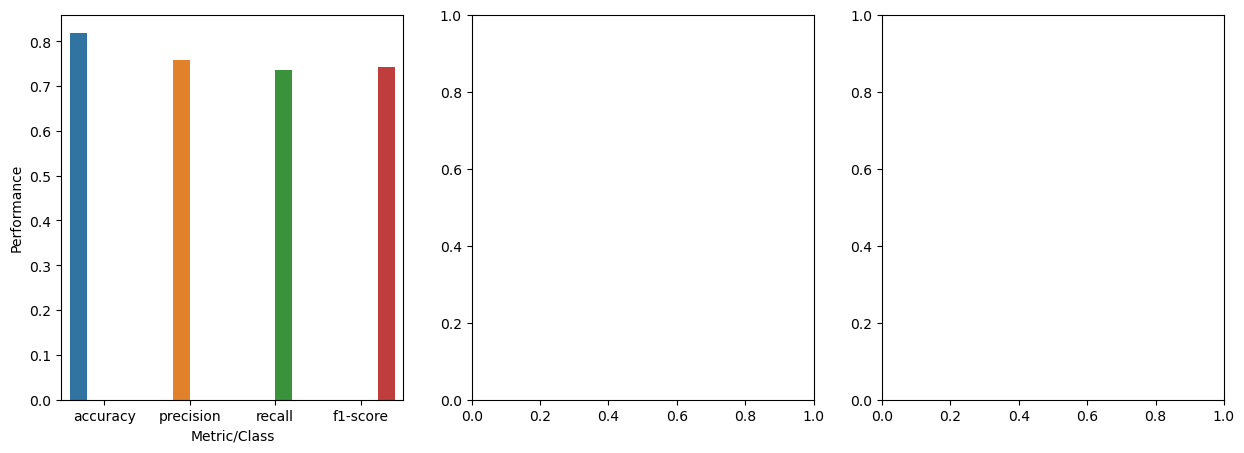

In [ ]:

tester_exp1.plot_model_performance_histograms(performances)

In [ ]:
tester_exp1.best_param_calculator_ensamble_by_label(cv=5)

Testing model: StackingClassifier(estimators=[('LogisticRegression', LogisticRegression()),
                               ('SVC', SVC(probability=True))]) with GridSearchCV
Fitting 5 folds for each of 72 candidates, totalling 360 fits


	Best parameters for f1_GREEN: {'LogisticRegression__C': 1, 'LogisticRegression__max_iter': 100, 'SVC__C': 1, 'SVC__gamma': 'scale', 'SVC__kernel': 'linear'}
	Best score for f1_GREEN: 0.9101078741337009
	Best parameters for f1_RED: {'LogisticRegression__C': 1, 'LogisticRegression__max_iter': 100, 'SVC__C': 1, 'SVC__gamma': 'scale', 'SVC__kernel': 'linear'}
	Best score for f1_RED: 0.8389999999999999
	Best parameters for f1_YELLOW: {'LogisticRegression__C': 1, 'LogisticRegression__max_iter': 100, 'SVC__C': 1, 'SVC__gamma': 'scale', 'SVC__kernel': 'linear'}
	Best score for f1_YELLOW: 0.5712039072039071
	Best parameters for precision_GREEN: {'LogisticRegression__C': 1, 'LogisticRegression__max_iter': 100, 'SVC__C': 1, 'SVC__gamma': 'scale', 'SVC__kernel': 'linear'}
	Best score for precision_GREEN: 0.8847615018798203
	Best parameters for precision_RED: {'LogisticRegression__C': 1, 'LogisticRegression__max_iter': 100, 'SVC__C': 1, 'SVC__gamma': 'scale', 'SVC__kernel': 'linear'}
	Best score f

In [ ]:
tester_exp1.best_param_calculator_ensamble_from_augmented_data_by_label(cv=5)

for augmented data with SMOTE
            Age  Gender_M  fumatore?  ex-fumatore?  non-fumatore?  \
0     43.000000         0          0             0              1   
1     79.000000         1          0             1              0   
2     81.000000         1          1             0              0   
3     81.000000         1          0             0              1   
4     48.000000         0          0             0              1   
...         ...       ...        ...           ...            ...   
1078  33.126066         0          0             0              1   
1079  86.287093         1          0             0              1   
1080  81.764948         1          0             0              1   
1081  34.753948         1          1             0              0   
1082  58.714404         0          0             0              1   

      previous_alert_GREEN  previous_alert_RED  previous_alert_YELLOW  \
0                        0                   0                      

	Best parameters for f1_GREEN: {'LogisticRegression__C': 10, 'LogisticRegression__max_iter': 100, 'SVC__C': 10, 'SVC__gamma': 'auto', 'SVC__kernel': 'poly'}
	Best score for f1_GREEN: 0.916383317106266
	Best parameters for f1_RED: {'LogisticRegression__C': 10, 'LogisticRegression__max_iter': 100, 'SVC__C': 10, 'SVC__gamma': 'auto', 'SVC__kernel': 'poly'}
	Best score for f1_RED: 0.9169952555306375
	Best parameters for f1_YELLOW: {'LogisticRegression__C': 10, 'LogisticRegression__max_iter': 100, 'SVC__C': 10, 'SVC__gamma': 'auto', 'SVC__kernel': 'poly'}
	Best score for f1_YELLOW: 0.8516679786160747
	Best parameters for precision_GREEN: {'LogisticRegression__C': 10, 'LogisticRegression__max_iter': 100, 'SVC__C': 10, 'SVC__gamma': 'auto', 'SVC__kernel': 'poly'}
	Best score for precision_GREEN: 0.9365315350568661
	Best parameters for precision_RED: {'LogisticRegression__C': 10, 'LogisticRegression__max_iter': 100, 'SVC__C': 10, 'SVC__gamma': 'auto', 'SVC__kernel': 'poly'}
	Best score for pre

	Best parameters for f1_GREEN: {'LogisticRegression__C': 10, 'LogisticRegression__max_iter': 100, 'SVC__C': 10, 'SVC__gamma': 'auto', 'SVC__kernel': 'poly'}
	Best score for f1_GREEN: 0.9166155022218897
	Best parameters for f1_RED: {'LogisticRegression__C': 10, 'LogisticRegression__max_iter': 100, 'SVC__C': 10, 'SVC__gamma': 'auto', 'SVC__kernel': 'poly'}
	Best score for f1_RED: 0.9197378449791203
	Best parameters for f1_YELLOW: {'LogisticRegression__C': 10, 'LogisticRegression__max_iter': 100, 'SVC__C': 10, 'SVC__gamma': 'auto', 'SVC__kernel': 'poly'}
	Best score for f1_YELLOW: 0.8540971363793648
	Best parameters for precision_GREEN: {'LogisticRegression__C': 10, 'LogisticRegression__max_iter': 100, 'SVC__C': 10, 'SVC__gamma': 'auto', 'SVC__kernel': 'poly'}
	Best score for precision_GREEN: 0.9341092234092023
	Best parameters for precision_RED: {'LogisticRegression__C': 10, 'LogisticRegression__max_iter': 100, 'SVC__C': 10, 'SVC__gamma': 'auto', 'SVC__kernel': 'poly'}
	Best score for pr

In [ ]:
tester_exp1.best_param_calculator(cv=5,avg='macro')

Testing model: LogisticRegression() with GridSearchCV
Fitting 5 folds for each of 6 candidates, totalling 30 fits


	Best parameters for f1: {'C': 10, 'max_iter': 100}
	Best score for f1: 0.7784932321974755
	Best parameters for accuracy: {'C': 10, 'max_iter': 100}
	Best score for accuracy: 0.8383333333333333
	Best parameters for precision: {'C': 10, 'max_iter': 100}
	Best score for precision: 0.7937147306013461
	Best parameters for recall: {'C': 10, 'max_iter': 100}
	Best score for recall: 0.7749398230869344
Testing model: SVC(probability=True) with GridSearchCV
Fitting 5 folds for each of 12 candidates, totalling 60 fits


	Best parameters for f1: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
	Best score for f1: 0.7888605851373367
	Best parameters for accuracy: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
	Best score for accuracy: 0.8433333333333334
	Best parameters for precision: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
	Best score for precision: 0.8038564946706147
	Best parameters for recall: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
	Best score for recall: 0.7838897050713609


In [ ]:
tester_exp1.best_param_calculator_by_label(cv=5)

Testing model: LogisticRegression() with GridSearchCV
Fitting 5 folds for each of 6 candidates, totalling 30 fits
	Best parameters for f1_GREEN: {'C': 10, 'max_iter': 100}
	Best score for f1_GREEN: 0.9092853147590241
	Best parameters for f1_RED: {'C': 10, 'max_iter': 100}
	Best score for f1_RED: 0.8400423435074513
	Best parameters for f1_YELLOW: {'C': 10, 'max_iter': 100}
	Best score for f1_YELLOW: 0.5861520383259513
	Best parameters for precision_GREEN: {'C': 10, 'max_iter': 100}
	Best score for precision_GREEN: 0.8927130163383803
	Best parameters for precision_RED: {'C': 10, 'max_iter': 100}
	Best score for precision_RED: 0.8234961105305934
	Best parameters for precision_YELLOW: {'C': 10, 'max_iter': 100}
	Best score for precision_YELLOW: 0.6649350649350648
	Best parameters for recall_GREEN: {'C': 10, 'max_iter': 100}
	Best score for recall_GREEN: 0.9278919330289194
	Best parameters for recall_RED: {'C': 10, 'max_iter': 100}
	Best score for recall_RED: 0.8603333333333334
	Best parame

	Best parameters for f1_GREEN: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
	Best score for f1_GREEN: 0.9113433346848673
	Best parameters for f1_RED: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
	Best score for f1_RED: 0.845299938157081
	Best parameters for f1_YELLOW: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
	Best score for f1_YELLOW: 0.6099384825700616
	Best parameters for precision_GREEN: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
	Best score for precision_GREEN: 0.8963922857980936
	Best parameters for precision_RED: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
	Best score for precision_RED: 0.843095238095238
	Best parameters for precision_YELLOW: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
	Best score for precision_YELLOW: 0.6720819601185125
	Best parameters for recall_GREEN: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
	Best score for recall_GREEN: 0.9279299847792999
	Best parameters for recall_RED: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
	Best score for

In [ ]:
tester_exp1.best_param_calculator_from_augmented_data(cv=5)

for augmented data with SMOTE
Testing model: LogisticRegression() with GridSearchCV
Fitting 5 folds for each of 6 candidates, totalling 30 fits
	Best parameters for f1: {'C': 10, 'max_iter': 100}
	Best score for f1: 0.823886770582881
	Best parameters for accuracy: {'C': 10, 'max_iter': 100}
	Best score for accuracy: 0.8245349035671616
	Best parameters for precision: {'C': 10, 'max_iter': 100}
	Best score for precision: 0.8271252950207139
	Best parameters for recall: {'C': 10, 'max_iter': 100}
	Best score for recall: 0.8244545915778794
Testing model: SVC(probability=True) with GridSearchCV
Fitting 5 folds for each of 12 candidates, totalling 60 fits


	Best parameters for f1: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
	Best score for f1: 0.8917843783348254
	Best parameters for accuracy: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
	Best score for accuracy: 0.8910692951015532
	Best parameters for precision: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
	Best score for precision: 0.896102520146386
	Best parameters for recall: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
	Best score for recall: 0.8910958904109588
for augmented data with ADASYN
Testing model: LogisticRegression() with GridSearchCV
Fitting 5 folds for each of 6 candidates, totalling 30 fits
	Best parameters for f1: {'C': 10, 'max_iter': 100}
	Best score for f1: 0.823886770582881
	Best parameters for accuracy: {'C': 10, 'max_iter': 100}
	Best score for accuracy: 0.8245349035671616
	Best parameters for precision: {'C': 10, 'max_iter': 100}
	Best score for precision: 0.8271252950207139
	Best parameters for recall: {'C': 10, 'max_iter': 100}
	Best score for recall: 0.82

	Best parameters for f1: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
	Best score for f1: 0.8917843783348254
	Best parameters for accuracy: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
	Best score for accuracy: 0.8910692951015532
	Best parameters for precision: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
	Best score for precision: 0.896102520146386
	Best parameters for recall: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
	Best score for recall: 0.8910958904109588


In [ ]:
tester_exp1.best_param_calculator_from_augmented_data_by_label(cv=5)

Testing model: LogisticRegression() with GridSearchCV
Fitting 5 folds for each of 6 candidates, totalling 30 fits
	Best parameters for f1_GREEN: {'C': 1, 'max_iter': 100}
	Best score for f1_GREEN: 0.8806578002974925
	Best parameters for f1_RED: {'C': 1, 'max_iter': 100}
	Best score for f1_RED: 0.8423416194439162
	Best parameters for f1_YELLOW: {'C': 1, 'max_iter': 100}
	Best score for f1_YELLOW: 0.7399670701700666
	Best parameters for precision_GREEN: {'C': 1, 'max_iter': 100}
	Best score for precision_GREEN: 0.893132694910884
	Best parameters for precision_RED: {'C': 1, 'max_iter': 100}
	Best score for precision_RED: 0.8270188578516808
	Best parameters for precision_YELLOW: {'C': 1, 'max_iter': 100}
	Best score for precision_YELLOW: 0.7521124747436952
	Best parameters for recall_GREEN: {'C': 1, 'max_iter': 100}
	Best score for recall_GREEN: 0.8697108066971081
	Best parameters for recall_RED: {'C': 1, 'max_iter': 100}
	Best score for recall_RED: 0.8615296803652969
	Best parameters for 

	Best parameters for f1_GREEN: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
	Best score for f1_GREEN: 0.9049470336986787
	Best parameters for f1_RED: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
	Best score for f1_RED: 0.9141572679151355
	Best parameters for f1_YELLOW: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
	Best score for f1_YELLOW: 0.8562488333906618
	Best parameters for precision_GREEN: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
	Best score for precision_GREEN: 0.9535272457011587
	Best parameters for precision_RED: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
	Best score for precision_RED: 0.9176580935404465
	Best parameters for precision_YELLOW: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
	Best score for precision_YELLOW: 0.8171222211975533
	Best parameters for recall_GREEN: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
	Best score for recall_GREEN: 0.8616438356164384
	Best parameters for recall_RED: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
	Best score for recal

	Best parameters for f1_GREEN: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
	Best score for f1_GREEN: 0.9049470336986787
	Best parameters for f1_RED: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
	Best score for f1_RED: 0.9141572679151355
	Best parameters for f1_YELLOW: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
	Best score for f1_YELLOW: 0.8562488333906618
	Best parameters for precision_GREEN: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
	Best score for precision_GREEN: 0.9535272457011587
	Best parameters for precision_RED: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
	Best score for precision_RED: 0.9176580935404465
	Best parameters for precision_YELLOW: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
	Best score for precision_YELLOW: 0.8171222211975533
	Best parameters for recall_GREEN: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
	Best score for recall_GREEN: 0.8616438356164384
	Best parameters for recall_RED: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
	Best score for recal

In [ ]:
tester_exp1.performances

{'overall': {'LogisticRegression': {'f1': {'{"C": 0.1, "max_iter": 100}': nan},
   'accuracy': {'{"C": 0.1, "max_iter": 100}': 0.8066666666666666},
   'precision': {'{"C": 0.1, "max_iter": 100}': nan},
   'recall': {'{"C": 0.1, "max_iter": 100}': nan}},
  'SVC': {'f1': {'{"C": 0.1, "gamma": "scale", "kernel": "linear"}': nan},
   'accuracy': {'{"C": 0.1, "gamma": "scale", "kernel": "linear"}': 0.8316666666666667},
   'precision': {'{"C": 0.1, "gamma": "scale", "kernel": "linear"}': nan},
   'recall': {'{"C": 0.1, "gamma": "scale", "kernel": "linear"}': nan}},
  'StackingClassifier': {'f1': {'{"LogisticRegression__C": 0.1, "LogisticRegression__max_iter": 100, "SVC__C": 0.1, "SVC__gamma": "scale", "SVC__kernel": "linear"}': 0.777102240354542},
   'accuracy': {'{"LogisticRegression__C": 0.1, "LogisticRegression__max_iter": 100, "SVC__C": 0.1, "SVC__gamma": "scale", "SVC__kernel": "linear"}': 0.8416666666666666},
   'precision': {'{"LogisticRegression__C": 0.1, "LogisticRegression__max_ite

In [ ]:
tester.make_dataframe_performances(tester.performances)

,Experiment,Model,Metric/Class,Hyperparameters,Performance
0,overall,LogisticRegression,f1,"{""C"": 10, ""max_iter"": 100}",0.778493
1,overall,LogisticRegression,accuracy,"{""C"": 10, ""max_iter"": 100}",0.838333
2,overall,LogisticRegression,precision,"{""C"": 10, ""max_iter"": 100}",0.793715
3,overall,LogisticRegression,recall,"{""C"": 10, ""max_iter"": 100}",0.774940
4,overall,SVC,f1,"{""C"": 1, ""gamma"": ""scale"", ""kernel"": ""linear""}",0.788861
...,...,...,...,...,...
104,specific_ADASYN,StackingClassifier,precision_RED,"{""LogisticRegression__C"": 10, ""LogisticRegress...",0.924049
105,specific_ADASYN,StackingClassifier,precision_YELLOW,"{""LogisticRegression__C"": 10, ""LogisticRegress...",0.839330
106,specific_ADASYN,StackingClassifier,recall_GREEN,"{""LogisticRegression__C"": 10, ""LogisticRegress...",0.900304
107,specific_ADASYN,StackingClassifier,recall_RED,"{""LogisticRegression__C"": 10, ""LogisticRegress...",0.916933
